# Importing packages and downloading dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Downloading the dataset.
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2019-04-11 07:13:45--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  3.89MB/s    in 57s     

2019-04-11 07:14:42 (4.18 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [0]:
## Unzipping dataset
!ls
!unzip -qq 'tiny-imagenet-200.zip'
!ls

drive  sample_data  tiny-imagenet-200.zip
drive  sample_data  tiny-imagenet-200  tiny-imagenet-200.zip


In [0]:
## Downloading CLR package
import sys
! git clone --recursive https://github.com/bckenstler/CLR.git
sys.path.insert(0, '/content/CLR')

Cloning into 'CLR'...
remote: Enumerating objects: 244, done.
remote: Total 244 (delta 0), reused 0 (delta 0), pack-reused 244
Receiving objects: 100% (244/244), 1.37 MiB | 1.50 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [0]:
TRAINING_DIR = "/content/tiny-imagenet-200/train/"
VALIDATION_DIR = "/content/tiny-imagenet-200/val/"

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn import preprocessing
from keras.utils import np_utils
import cv2 as cv
import pandas as pd

Using TensorFlow backend.


#Getting X_train and Y_train

In [0]:
##When Loading full dataset

def load_training_data(training_dir, target_size=None):
  SIZE = 64
  images = []
  labels_list = []

  for classtype in os.listdir(training_dir):
    img_base = training_dir+classtype+"/images/"
    for img_name in os.listdir(img_base):
      img_path = os.path.join(img_base,img_name)
      img_data = cv.imread(img_path)
      if target_size:
        frac = target_size/SIZE
        img_data = cv.resize(img_data,None,fx=frac,fy=frac)
      images.append(img_data)
      labels_list.append(classtype)
      
       
  images = np.asarray(images)
  labels = np.asarray(labels_list)
  
  print("Loaded training images",images.shape)
  print("Loaded training labels",labels.shape)
  
  return images,labels


In [0]:
images, labels = load_training_data(TRAINING_DIR, 64)

#Rondomizing the training classes
permut = np.random.permutation(len(labels))
training_images = images[permut]
training_labels = labels[permut]

#Encoding labels
le = preprocessing.LabelEncoder()
le = le.fit(training_labels)
training_labels_encoded = le.transform(training_labels)
nb_classes = len(le.classes_)

X_train = training_images

#One Hot Encoding
pre_Y_train = training_labels_encoded
Y_train = np_utils.to_categorical(pre_Y_train, nb_classes)



Loaded training images (100000, 64, 64, 3)
Loaded training labels (100000,)


(100000, 64, 64, 3)
(100000, 200)
n04597913
175
175


{('n01443537', 0),
 ('n01629819', 1),
 ('n01641577', 2),
 ('n01644900', 3),
 ('n01698640', 4),
 ('n01742172', 5),
 ('n01768244', 6),
 ('n01770393', 7),
 ('n01774384', 8),
 ('n01774750', 9),
 ('n01784675', 10),
 ('n01855672', 11),
 ('n01882714', 12),
 ('n01910747', 13),
 ('n01917289', 14),
 ('n01944390', 15),
 ('n01945685', 16),
 ('n01950731', 17),
 ('n01983481', 18),
 ('n01984695', 19),
 ('n02002724', 20),
 ('n02056570', 21),
 ('n02058221', 22),
 ('n02074367', 23),
 ('n02085620', 24),
 ('n02094433', 25),
 ('n02099601', 26),
 ('n02099712', 27),
 ('n02106662', 28),
 ('n02113799', 29),
 ('n02123045', 30),
 ('n02123394', 31),
 ('n02124075', 32),
 ('n02125311', 33),
 ('n02129165', 34),
 ('n02132136', 35),
 ('n02165456', 36),
 ('n02190166', 37),
 ('n02206856', 38),
 ('n02226429', 39),
 ('n02231487', 40),
 ('n02233338', 41),
 ('n02236044', 42),
 ('n02268443', 43),
 ('n02279972', 44),
 ('n02281406', 45),
 ('n02321529', 46),
 ('n02364673', 47),
 ('n02395406', 48),
 ('n02403003', 49),
 ('n024105

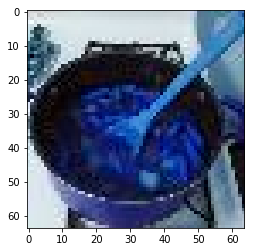

In [0]:
## For checking the X_train and Y_train and their One Hot Encoding

print(X_train.shape)
print(Y_train.shape)
print(training_labels[8178])
plt.imshow(training_images[8178])
print(pre_Y_train[8178])
print(np.argmax(Y_train[8178]))


## Getting a map of classnames and their respective encoded value
infer_encoded = list(set(training_labels))
infer_encoded_int = le.transform(infer_encoded)
infer_encoded_int_list = list(infer_encoded_int)
train_class_mapped = zip(infer_encoded,infer_encoded_int_list)
train_class_mapped = set(train_class_mapped)
train_class_mapped

# Getting X_test and Y_test

In [0]:
def get_label(val_notations, img_name):
  return list(val_notations[val_notations['File'] == img_name]['Class'])[0]

import pandas as pd
val_notations = pd.read_csv(VALIDATION_DIR + 'val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])

In [0]:
def load_validation_data(VALIDATION_DIR,labels,val_notations, target_size=None):
  
  labels_set = set(labels)
  label_dict = {}
  for i in range(len(labels_set)):
    label_dict[labels_set.pop()] = 0
 
  SIZE = 64
  CHANNEL = 3

  images_val_list = []
  labels_val_list = []

  validation_counter = 0
  for img_name in os.listdir(VALIDATION_DIR+"images/"):
    img_path = os.path.join(VALIDATION_DIR+"images/"+img_name)
    img_data = cv.imread(img_path)   
    name_label = get_label(val_notations,img_name)
    if name_label in label_dict.keys():  
      label_dict[name_label] += 1
      validation_counter+=1
      if target_size:
        frac = target_size/SIZE
        img_data = cv.resize(img_data,None,fx=frac,fy=frac)
      images_val_list.append(img_data)
      labels_val_list.append(name_label)
      if validation_counter%1000==0:
        print(validation_counter)
        print(label_dict)    
      
    
  images_val = np.asarray(images_val_list)
  labels_val = np.asarray(labels_val_list)
  
  print(validation_counter)
  print(label_dict)
  return images_val,labels_val


In [0]:
val_images, val_labels = load_validation_data(VALIDATION_DIR,labels,val_notations, 64)
print(len(val_labels))

permut = np.random.permutation(len(val_labels))
testing_images = val_images[permut]
testing_labels = val_labels[permut]


#Encoding labels
testing_labels_encoded = le.transform(testing_labels)
nb_classes_val = len(le.classes_)

X_test = testing_images

#One Hot Encoding
pre_Y_test = testing_labels_encoded
Y_test = np_utils.to_categorical(pre_Y_test, nb_classes_val)


1000
{'n02132136': 8, 'n03902125': 4, 'n03770439': 7, 'n03400231': 3, 'n02403003': 4, 'n02814860': 3, 'n03617480': 4, 'n04486054': 14, 'n04311004': 8, 'n04074963': 7, 'n03891332': 2, 'n02509815': 10, 'n04285008': 3, 'n01784675': 6, 'n02190166': 5, 'n01774750': 6, 'n02948072': 7, 'n04560804': 4, 'n03355925': 3, 'n03255030': 4, 'n07615774': 6, 'n03544143': 3, 'n03042490': 5, 'n02841315': 3, 'n04456115': 6, 'n02793495': 1, 'n02795169': 4, 'n02977058': 5, 'n07753592': 5, 'n09193705': 2, 'n03179701': 3, 'n04376876': 9, 'n01770393': 4, 'n02281406': 5, 'n02321529': 3, 'n02906734': 6, 'n02999410': 6, 'n01983481': 5, 'n07747607': 4, 'n02106662': 3, 'n02085620': 5, 'n03992509': 6, 'n02669723': 6, 'n04251144': 7, 'n02231487': 4, 'n04487081': 4, 'n02963159': 4, 'n02481823': 9, 'n07873807': 2, 'n02094433': 6, 'n02437312': 4, 'n02099601': 1, 'n02988304': 5, 'n03201208': 7, 'n02058221': 3, 'n07583066': 6, 'n04070727': 5, 'n02699494': 4, 'n02410509': 6, 'n03393912': 9, 'n04532106': 5, 'n07715103': 4, 

(10000, 64, 64, 3)
(10000, 200)
[ 64 111 130  41 125  25 122  11 197  37]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
24
n02085620


{('n01443537', 0),
 ('n01629819', 1),
 ('n01641577', 2),
 ('n01644900', 3),
 ('n01698640', 4),
 ('n01742172', 5),
 ('n01768244', 6),
 ('n01770393', 7),
 ('n01774384', 8),
 ('n01774750', 9),
 ('n01784675', 10),
 ('n01855672', 11),
 ('n01882714', 12),
 ('n01910747', 13),
 ('n01917289', 14),
 ('n01944390', 15),
 ('n01945685', 16),
 ('n01950731', 17),
 ('n01983481', 18),
 ('n01984695', 19),
 ('n02002724', 20),
 ('n02056570', 21),
 ('n02058221', 22),
 ('n02074367', 23),
 ('n02085620', 24),
 ('n02094433', 25),
 ('n02099601', 26),
 ('n02099712', 27),
 ('n02106662', 28),
 ('n02113799', 29),
 ('n02123045', 30),
 ('n02123394', 31),
 ('n02124075', 32),
 ('n02125311', 33),
 ('n02129165', 34),
 ('n02132136', 35),
 ('n02165456', 36),
 ('n02190166', 37),
 ('n02206856', 38),
 ('n02226429', 39),
 ('n02231487', 40),
 ('n02233338', 41),
 ('n02236044', 42),
 ('n02268443', 43),
 ('n02279972', 44),
 ('n02281406', 45),
 ('n02321529', 46),
 ('n02364673', 47),
 ('n02395406', 48),
 ('n02403003', 49),
 ('n024105

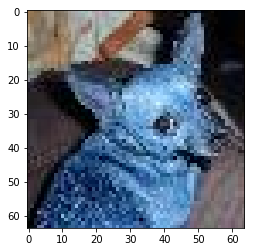

In [0]:
## For checking the X_test and Y_test and their One Hot Encoding
print(X_test.shape)
print(Y_test.shape)
print(pre_Y_test[:10])
print(Y_test[:10])
print(np.argmax(Y_test[453]))

i = 453
print(testing_labels[i])
plt.imshow(testing_images[i])

## Getting a map of classnames and their respective encoded value
infer_encoded_val = list(set(testing_labels))
infer_encoded_int_val = le.transform(infer_encoded_val)
infer_encoded_int_list_val = list(infer_encoded_int_val)

test_class_mapped = zip(infer_encoded_val,infer_encoded_int_list_val)
test_class_mapped = set(train_class_mapped)
test_class_mapped

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 128.
X_test /= 128.

In [0]:
test_class_mapped == train_class_mapped

True

# Model

## Libraries and model building

In [0]:
import keras
from keras.layers.merge import add
from keras.models import Model, Sequential
from keras.layers import Flatten, Input, merge, Activation,SeparableConv2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU,ReLU
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Lambda
from keras.layers.merge import concatenate

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

from keras.layers import GlobalAveragePooling2D
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

In [0]:
def blocks(inp, kernel_nos, n):

  layer1 = Conv2D(kernel_nos, (3,3), strides=(1,1), padding='same', use_bias=False)(inp)
  layer1 = BatchNormalization()(layer1)
  layer1 = LeakyReLU(alpha=0.1)(layer1)
  
  kernel_nos *= 2
 
  layer2 = Conv2D(kernel_nos, (3,3), strides=(1,1), padding='same', use_bias=False)(layer1)
  layer2 = BatchNormalization()(layer2)
  layer2 = LeakyReLU(alpha=0.1)(layer2)
    
  kernel_nos *= 2

  layer3 = Conv2D(kernel_nos, (3,3), strides=(1,1), padding='same', use_bias=False)(layer2)
  layer3 = BatchNormalization()(layer3)
  layer3 = LeakyReLU(alpha=0.1)(layer3)
    
  if n==1:
    kernel_nos = 96
  elif n==2:
    kernel_nos = 128
  else:
    kernel_nos *= 2

  layer4 = Conv2D(kernel_nos, (3,3), strides=(1,1), padding='same', use_bias=False)(layer3)
  layer4 = BatchNormalization()(layer4)
  layer4 = LeakyReLU(alpha=0.1)(layer4)
  
  if n==1:
    kernel_nos = 148
  elif n==2:
    kernel_nos = 124
  elif n==3:
    kernel_nos = 640
  else:
    kernel_nos *= 2

  layer5 = Conv2D(kernel_nos, (3,3), strides=(1,1), padding='same', use_bias=False)(layer4)
  layer5 = BatchNormalization()(layer5)
  layer5 = LeakyReLU(alpha=0.1)(layer5)
  
  return layer5


input = Input(shape=(None, None, 3,))

block1 = blocks(input, 16, 1)
#add 1X1 --84
skip_connection1 = block1
skip_connection1 = Conv2D(32, (1,1), strides=(1,1), padding='same', use_bias=False)(skip_connection1)
skip_connection1 = Lambda(space_to_depth_x2)(skip_connection1)

block2 = blocks(block1, 24, 2)
#add 1X1 --84
block2 = MaxPooling2D(pool_size=(2, 2))(block2)

concat1_2 = concatenate([skip_connection1, block2])
#add 1X1 before passing concat to next block
block3 = blocks(concat1_2, 48, 3)
#add 1X1
block3 = MaxPooling2D(pool_size=(2, 2))(block3)

skip_connection2 = Conv2D(64, (1,1), strides=(1,1), padding='same', use_bias=False)(concat1_2)
skip_connection2 = Lambda(space_to_depth_x2)(skip_connection2)

concat2_3 = concatenate([skip_connection2, block3])

concat = Conv2D(1024, (1,1), strides=(1,1), padding='same', use_bias=False)(concat2_3)
concat = Conv2D(nb_classes, (1,1), strides=(1,1), padding='same', use_bias=False)(concat)

concat = GlobalAveragePooling2D()(concat)
output = Activation('softmax')(concat)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 1 432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 1 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, None, None, 1 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

## Training

### Training on 32X32 image size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(100000, 32, 32, 3)
(100000, 200)
(10000, 32, 32, 3)
(10000, 200)
174


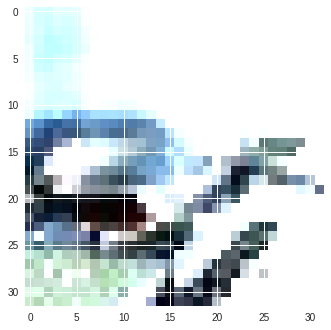

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

plt.imshow(X_train[83456])
print(np.argmax(Y_train[83456]))


In [0]:
##Setting hyperparameters and callbacks

from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import numpy as np
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')

filepath="/content/drive/My Drive/ass4/_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 12
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9

## Compiling
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train,
          batch_size=1024,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 100000 samples, validate on 10000 samples
Epoch 1/12
100000/100000 [==============================] - 376s 4ms/step - loss: 4.5126 - acc: 0.0809 - val_loss: 4.8652 - val_acc: 0.0743
Epoch 2/12
100000/100000 [==============================] - 357s 4ms/step - loss: 3.7666 - acc: 0.1740 - val_loss: 3.7499 - val_acc: 0.1753
Epoch 3/12
100000/100000 [==============================] - 357s 4ms/step - loss: 3.4084 - acc: 0.2319 - val_loss: 3.6868 - val_acc: 0.2021

Epoch 00003: val_acc improved from -inf to 0.20210, saving model to /content/drive/My Drive/ass4/_epochs:003-acc:0.232-val_acc:0.202.hdf5
Epoch 4/12
100000/100000 [==============================] - 357s 4ms/step - loss: 3.1659 - acc: 0.2748 - val_loss: 3.3317 - val_acc: 0.2443
Epoch 5/12
100000/100000 [==============================] - 357s 4ms/step - loss: 2.9830 - acc: 0.3089 - val_loss: 3.2436 - val_acc: 0.2613
Epoch 6/12
100000/100000 [==============================] - 357s 4ms/step - loss: 2.8426 - acc: 0.3341 - val_l

### Training for 16x16
- I am changing image size by running code chunk from above
- Below code prints the shape of X_train, Y_train, X_test, Y_test after loading of images are done in 16X16 size



In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 16, 16, 3)
(100000, 200)
(10000, 16, 16, 3)
(10000, 200)


In [0]:
filepath="/content/drive/My Drive/ass4/_32_16_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 9

model.fit(X_train, Y_train,
          batch_size=1024,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 100000 samples, validate on 10000 samples
Epoch 1/9
100000/100000 [==============================] - 104s 1ms/step - loss: 3.1571 - acc: 0.2888 - val_loss: 3.4384 - val_acc: 0.2438
Epoch 2/9
100000/100000 [==============================] - 92s 921us/step - loss: 2.9716 - acc: 0.3141 - val_loss: 3.2440 - val_acc: 0.2748
Epoch 3/9
100000/100000 [==============================] - 92s 920us/step - loss: 2.8838 - acc: 0.3306 - val_loss: 3.1833 - val_acc: 0.2821

Epoch 00003: val_acc improved from -inf to 0.28210, saving model to /content/drive/My Drive/ass4/_32_16_epochs:003-acc:0.331-val_acc:0.282.hdf5
Epoch 4/9
100000/100000 [==============================] - 92s 922us/step - loss: 2.8187 - acc: 0.3424 - val_loss: 3.1610 - val_acc: 0.2908
Epoch 5/9
100000/100000 [==============================] - 92s 922us/step - loss: 2.7616 - acc: 0.3544 - val_loss: 3.1560 - val_acc: 0.2914
Epoch 6/9
100000/100000 [==============================] - 92s 919us/step - loss: 2.7091 - acc: 0.3635 - 

### Training for 64X64
- I am changing image size by running code chunk from above
- Below code prints the shape of X_train, Y_train, X_test, Y_test after loading of images are done in 64X64 size



In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 64, 64, 3)
(100000, 200)
(10000, 64, 64, 3)
(10000, 200)


In [0]:
filepath="/content/drive/My Drive/ass4/_32_16_64_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 1

model.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 100000 samples, validate on 10000 samples
Epoch 1/1
100000/100000 [==============================] - 1813s 18ms/step - loss: 2.8058 - acc: 0.3481 - val_loss: 2.8848 - val_acc: 0.3303

Epoch 00001: val_acc improved from -inf to 0.33030, saving model to /content/drive/My Drive/ass4/_32_16_64_epochs:001-acc:0.348-val_acc:0.330.hdf5


In [0]:
## Loading Model from the last 16X16 checkpoint  
from keras.models import load_model
import tensorflow as tf
model = load_model('/content/drive/My Drive/ass4/_32_16_epochs:009-acc:0.390-val_acc:0.297.hdf5',custom_objects={'tf': tf})


In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint
from keras.callbacks import ModelCheckpoint
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')


filepath="/content/drive/My Drive/ass4/_32_16_64_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 9

model.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 100000 samples, validate on 10000 samples
Epoch 1/9
100000/100000 [==============================] - 1934s 19ms/step - loss: 2.8071 - acc: 0.3475 - val_loss: 2.9046 - val_acc: 0.3271

Epoch 00001: val_acc improved from -inf to 0.32710, saving model to /content/drive/My Drive/ass4/_32_16_64_epochs:001-acc:0.348-val_acc:0.327.hdf5
Epoch 2/9
100000/100000 [==============================] - 1916s 19ms/step - loss: 2.5514 - acc: 0.3966 - val_loss: 3.0069 - val_acc: 0.3130

Epoch 00002: val_acc did not improve from 0.32710
Epoch 3/9
100000/100000 [==============================] - 1914s 19ms/step - loss: 2.4395 - acc: 0.4191 - val_loss: 2.8964 - val_acc: 0.3279

Epoch 00003: val_acc improved from 0.32710 to 0.32790, saving model to /content/drive/My Drive/ass4/_32_16_64_epochs:003-acc:0.419-val_acc:0.328.hdf5
Epoch 4/9
100000/100000 [==============================] - 1916s 19ms/step - loss: 2.3522 - acc: 0.4360 - val_loss: 2.8784 - val_acc: 0.3360

Epoch 00004: val_acc improved from

### Training on 32X32 again

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(100000, 32, 32, 3)
(100000, 200)
(10000, 32, 32, 3)
(10000, 200)
161


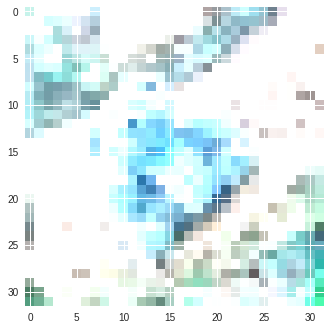

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

plt.imshow(X_train[83456])
print(np.argmax(Y_train[83456]))


In [0]:
from keras.models import load_model
import tensorflow as tf
model2 = load_model('/content/drive/My Drive/ass4/_32_16_64_epochs:009-acc:0.493-val_acc:0.421.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint
from keras.callbacks import ModelCheckpoint
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')


filepath="/content/drive/My Drive/ass4/_32_16_64_32_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 12

model2.fit(X_train, Y_train,
          batch_size=256,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 100000 samples, validate on 10000 samples
Epoch 1/12
100000/100000 [==============================] - 406s 4ms/step - loss: 2.3056 - acc: 0.4467 - val_loss: 2.6119 - val_acc: 0.3969
Epoch 2/12
100000/100000 [==============================] - 383s 4ms/step - loss: 2.0941 - acc: 0.4850 - val_loss: 2.5308 - val_acc: 0.4097
Epoch 3/12
100000/100000 [==============================] - 384s 4ms/step - loss: 2.0177 - acc: 0.5016 - val_loss: 2.4976 - val_acc: 0.4166

Epoch 00003: val_acc improved from -inf to 0.41660, saving model to /content/drive/My Drive/ass4/_32_16_64_32_epochs:003-acc:0.502-val_acc:0.417.hdf5
Epoch 4/12
100000/100000 [==============================] - 384s 4ms/step - loss: 1.9644 - acc: 0.5119 - val_loss: 2.4869 - val_acc: 0.4149
Epoch 5/12
100000/100000 [==============================] - 383s 4ms/step - loss: 1.9219 - acc: 0.5220 - val_loss: 2.5112 - val_acc: 0.4194
Epoch 6/12
100000/100000 [==============================] - 384s 4ms/step - loss: 1.8816 - acc: 0.

### Training on 16X16 again

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 16, 16, 3)
(100000, 200)
(10000, 16, 16, 3)
(10000, 200)


In [0]:
filepath="/content/drive/My Drive/ass4/_32_16_64_32_16_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)

callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 6

model2.fit(X_train, Y_train,
          batch_size=1024,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 100000 samples, validate on 10000 samples
Epoch 1/6
100000/100000 [==============================] - 123s 1ms/step - loss: 3.5346 - acc: 0.2901 - val_loss: 3.7975 - val_acc: 0.2308
Epoch 2/6
100000/100000 [==============================] - 98s 977us/step - loss: 3.1277 - acc: 0.3193 - val_loss: 3.5308 - val_acc: 0.2667
Epoch 3/6
100000/100000 [==============================] - 97s 974us/step - loss: 2.9718 - acc: 0.3324 - val_loss: 3.4486 - val_acc: 0.2775

Epoch 00003: val_acc improved from -inf to 0.27750, saving model to /content/drive/My Drive/ass4/_32_16_64_32_16_epochs:003-acc:0.332-val_acc:0.278.hdf5
Epoch 4/6
100000/100000 [==============================] - 97s 973us/step - loss: 2.8763 - acc: 0.3416 - val_loss: 3.3753 - val_acc: 0.2844
Epoch 5/6
100000/100000 [==============================] - 97s 974us/step - loss: 2.8119 - acc: 0.3502 - val_loss: 3.3210 - val_acc: 0.2900
Epoch 6/6
100000/100000 [==============================] - 98s 977us/step - loss: 2.7637 - acc: 

### Training for 64X64 again

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 64, 64, 3)
(100000, 200)
(10000, 64, 64, 3)
(10000, 200)


In [0]:
## loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model2 = load_model('/content/drive/My Drive/ass4/_32_16_64_32_16_epochs:006-acc:0.357-val_acc:0.291.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint
from keras.callbacks import ModelCheckpoint
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')

In [0]:
filepath="/content/drive/My Drive/ass4/_32_16_64_32_16_64_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)

callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 9

model2.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 100000 samples, validate on 10000 samples
Epoch 1/9
100000/100000 [==============================] - 2079s 21ms/step - loss: 2.3069 - acc: 0.4554 - val_loss: 2.3819 - val_acc: 0.4344
Epoch 2/9
100000/100000 [==============================] - 2054s 21ms/step - loss: 2.0528 - acc: 0.5058 - val_loss: 2.3379 - val_acc: 0.4416
Epoch 3/9
100000/100000 [==============================] - 2051s 21ms/step - loss: 1.9822 - acc: 0.5205 - val_loss: 2.2719 - val_acc: 0.4571

Epoch 00003: val_acc improved from -inf to 0.45710, saving model to /content/drive/My Drive/ass4/_32_16_64_32_16_64_epochs:003-acc:0.521-val_acc:0.457.hdf5
Epoch 4/9
 15488/100000 [===>..........................] - ETA: 28:04 - loss: 1.9338 - acc: 0.5326

In [0]:
## loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model2 = load_model('/content/drive/My Drive/ass4/_32_16_64_32_16_64_epochs:003-acc:0.521-val_acc:0.457.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint
from keras.callbacks import ModelCheckpoint
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')

In [0]:
filepath="/content/drive/My Drive/ass4/_32_16_64_32_16_64_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)

callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 6

model2.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 100000 samples, validate on 10000 samples
Epoch 1/6
100000/100000 [==============================] - 2059s 21ms/step - loss: 1.9417 - acc: 0.5287 - val_loss: 2.2625 - val_acc: 0.4559
Epoch 2/6
100000/100000 [==============================] - 2043s 20ms/step - loss: 1.9117 - acc: 0.5349 - val_loss: 2.2704 - val_acc: 0.4550
Epoch 3/6
100000/100000 [==============================] - 2042s 20ms/step - loss: 1.8895 - acc: 0.5398 - val_loss: 2.2604 - val_acc: 0.4543

Epoch 00003: val_acc improved from -inf to 0.45430, saving model to /content/drive/My Drive/ass4/_32_16_64_32_16_64_epochs:003-acc:0.540-val_acc:0.454.hdf5
Epoch 4/6
100000/100000 [==============================] - 2042s 20ms/step - loss: 1.8705 - acc: 0.5447 - val_loss: 2.2360 - val_acc: 0.4639
Epoch 5/6
100000/100000 [==============================] - 2044s 20ms/step - loss: 1.8541 - acc: 0.5478 - val_loss: 2.2292 - val_acc: 0.4664
Epoch 6/6
100000/100000 [==============================] - 2046s 20ms/step - loss: 1.83

### 32X32 before applying augmentation

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 32, 32, 3)
(100000, 200)
(10000, 32, 32, 3)
(10000, 200)


In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint
from keras.callbacks import ModelCheckpoint
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')


filepath="/content/drive/My Drive/ass4/_32_16_64_32_16_64_32_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 3

model2.fit(X_train, Y_train,
          batch_size=256,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 100000 samples, validate on 10000 samples
Epoch 1/3
100000/100000 [==============================] - 393s 4ms/step - loss: 1.9586 - acc: 0.5130 - val_loss: 2.5140 - val_acc: 0.4248
Epoch 2/3
100000/100000 [==============================] - 377s 4ms/step - loss: 1.7610 - acc: 0.5559 - val_loss: 2.4420 - val_acc: 0.4306
Epoch 3/3
100000/100000 [==============================] - 376s 4ms/step - loss: 1.6946 - acc: 0.5716 - val_loss: 2.4186 - val_acc: 0.4343

Epoch 00003: val_acc improved from -inf to 0.43430, saving model to /content/drive/My Drive/ass4/_32_16_64_32_16_64_32_epochs:003-acc:0.572-val_acc:0.434.hdf5


### Keras in built augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint

filepath="/content/drive/My Drive/ass4/_32_16_64_32_16_64_32_inbAug_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

In [0]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        zoom_range = 0.2,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        shear_range=0.2,
        fill_mode='nearest')
    
datagen.fit(X_train)


# Fit the model on the batches generated by datagen.flow().
model2.fit_generator(datagen.flow(X_train, Y_train, batch_size= 256),
                        steps_per_epoch=X_train.shape[0] // 256,
                        validation_data=(X_test, Y_test),
                        epochs=6, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)


Using real-time data augmentation.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., epochs=6, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`


Epoch 1/6
390/390 [==============================] - 377s 967ms/step - loss: 2.8957 - acc: 0.3419 - val_loss: 3.1487 - val_acc: 0.3299
Epoch 2/6
390/390 [==============================] - 377s 967ms/step - loss: 2.7738 - acc: 0.3564 - val_loss: 3.0878 - val_acc: 0.3317
Epoch 3/6
390/390 [==============================] - 377s 966ms/step - loss: 2.7252 - acc: 0.3639 - val_loss: 3.2637 - val_acc: 0.3156

Epoch 00003: val_acc improved from -inf to 0.31560, saving model to /content/drive/My Drive/ass4/_32_16_64_32_16_64_32_inbAug_epochs:003-acc:0.364-val_acc:0.316.hdf5
Epoch 4/6
390/390 [==============================] - 377s 966ms/step - loss: 2.7012 - acc: 0.3674 - val_loss: 3.1385 - val_acc: 0.3276
Epoch 5/6
390/390 [==============================] - 377s 966ms/step - loss: 2.6789 - acc: 0.3727 - val_loss: 3.1017 - val_acc: 0.3239
Epoch 6/6
390/390 [==============================] - 377s 967ms/step - loss: 2.6559 - acc: 0.3769 - val_loss: 3.0804 - val_acc: 0.3303

Epoch 00006: val_acc i

In [0]:
model2.fit_generator(datagen.flow(X_train, Y_train, batch_size= 256),
                        steps_per_epoch=X_train.shape[0] // 256,
                        validation_data=(X_test, Y_test),
                        epochs=6, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., epochs=6, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  """


Epoch 1/6
390/390 [==============================] - 377s 967ms/step - loss: 2.6456 - acc: 0.3777 - val_loss: 3.1096 - val_acc: 0.3266
Epoch 2/6
390/390 [==============================] - 377s 966ms/step - loss: 2.6346 - acc: 0.3797 - val_loss: 3.0462 - val_acc: 0.3355
Epoch 3/6
390/390 [==============================] - 377s 966ms/step - loss: 2.6264 - acc: 0.3837 - val_loss: 3.0208 - val_acc: 0.3360

Epoch 00003: val_acc improved from 0.33030 to 0.33600, saving model to /content/drive/My Drive/ass4/_32_16_64_32_16_64_32_inbAug_epochs:003-acc:0.384-val_acc:0.336.hdf5
Epoch 4/6
390/390 [==============================] - 377s 966ms/step - loss: 2.6097 - acc: 0.3850 - val_loss: 3.0170 - val_acc: 0.3340
Epoch 5/6
390/390 [==============================] - 377s 966ms/step - loss: 2.6042 - acc: 0.3852 - val_loss: 3.0952 - val_acc: 0.3262
Epoch 6/6
390/390 [==============================] - 377s 966ms/step - loss: 2.5975 - acc: 0.3872 - val_loss: 3.1399 - val_acc: 0.3195

Epoch 00006: val_ac

In [0]:
## loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model2 = load_model('/content/drive/My Drive/ass4/_32_16_64_32_16_64_32_inbAug_epochs:003-acc:0.384-val_acc:0.336.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')

filepath="/content/drive/My Drive/ass4/_32_16_64_32_16_64_32_inbAug2_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

In [0]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        zoom_range = 0.2,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        shear_range=0.2,
        fill_mode='nearest')
    
datagen.fit(X_train)


# Fit the model on the batches generated by datagen.flow().
model2.fit_generator(datagen.flow(X_train, Y_train, batch_size= 256),
                        steps_per_epoch=X_train.shape[0] // 256,
                        validation_data=(X_test, Y_test),
                        epochs=15, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)


Using real-time data augmentation.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., epochs=15, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`


Epoch 1/15
390/390 [==============================] - 379s 971ms/step - loss: 2.6095 - acc: 0.3868 - val_loss: 3.1687 - val_acc: 0.3139
Epoch 2/15
390/390 [==============================] - 371s 951ms/step - loss: 2.6005 - acc: 0.3851 - val_loss: 3.0625 - val_acc: 0.3324
Epoch 3/15
390/390 [==============================] - 364s 934ms/step - loss: 2.5969 - acc: 0.3873 - val_loss: 2.9813 - val_acc: 0.3388

Epoch 00003: val_acc improved from -inf to 0.33880, saving model to /content/drive/My Drive/ass4/_32_16_64_32_16_64_32_inbAug2_epochs:003-acc:0.387-val_acc:0.339.hdf5
Epoch 4/15
390/390 [==============================] - 365s 935ms/step - loss: 2.5888 - acc: 0.3883 - val_loss: 2.9869 - val_acc: 0.3422
Epoch 5/15
390/390 [==============================] - 365s 935ms/step - loss: 2.5814 - acc: 0.3904 - val_loss: 3.0690 - val_acc: 0.3286
Epoch 6/15
390/390 [==============================] - 364s 935ms/step - loss: 2.5771 - acc: 0.3920 - val_loss: 2.9893 - val_acc: 0.3420

Epoch 00006: va

### Custom imgaug augmentation

In [0]:
# prerequisites for imgaug library
!pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio Shapely

In [0]:
# image augmentation library imgaug (https://github.com/aleju/imgaug)
!pip install imgaug

# NOTE: make sure to Restart Runtime after this installation completes

    100% |████████████████████████████████| 17.3MB 2.2MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
# imgaug needs latest scikit module. so need to do this. else, will get some weird error related to numpy!
!pip install --upgrade scikit-image

# NOTE: make sure to Restart Runtime after this installation completes

    100% |████████████████████████████████| 26.3MB 1.5MB/s 
    100% |████████████████████████████████| 2.0MB 11.4MB/s 
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1
  Found existing installation: scikit-image 0.13.1
    Uninstalling scikit-image-0.13.1:
      Successfully uninstalled scikit-image-0.13.1


In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 32, 32, 3)
(100000, 200)
(10000, 32, 32, 3)
(10000, 200)


In [0]:
## Loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model_aug = load_model('/content/drive/My Drive/ass4/_32_16_64_32_16_64_32_inbAug2_epochs:006-acc:0.392-val_acc:0.342.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
score = model_aug.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 17s 2ms/step
Test loss: 2.989250016784668
Test accuracy: 0.342


In [0]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img
import imageio
import imgaug as ia
from imgaug import augmenters as iaa
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.use('Agg')


In [0]:
def customizedImgAug(input_img):
    """image augmentation using imgaug
    Args:
        input_img:
            image to be augmented (numpy tensor with rank 3)
    Return:
        augmented image(numpy tensor with rank 3) 
    """
    seq = iaa.Sequential(
        [    
          iaa.Fliplr(0.5), # horizontal flips
          # Small gaussian blur with random sigma between 0 and 0.2.
          # But we only blur about 50% of all images.
          # Strengthen or weaken the contrast in each image.
          iaa.Sometimes(0.5,
              iaa.GaussianBlur(sigma=(0, 0.3)),
              iaa.Sharpen(alpha=0.4)
          ),
              
          iaa.Sometimes(0.5,
              iaa.Affine(shear=(-16, 16)),
              iaa.ContrastNormalization((0.75, 1.5))
          ),
        # In 20% of all cases, we sample the multiplier once per channel,
        # which can end up changing the color of the images.
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        # Augmenter that sets rectangular areas within images to zero
        iaa.CoarseDropout((0.0, 0.12), size_percent=(0.10, 0.20)),
        ],random_order = True) # apply augmenters in random order
        
    output_img = seq.augment_image(input_img)
    return output_img

In [0]:
datagen = ImageDataGenerator(
        preprocessing_function = customizedImgAug)

Everything seems OK...


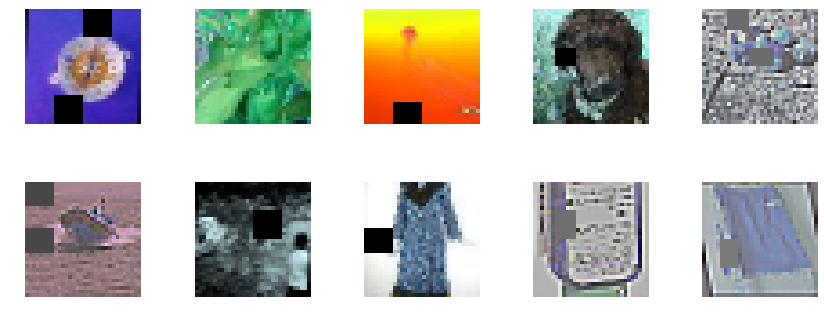

In [0]:
pics_num = 10
figure = plt.figure(figsize=(14, 5))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,hspace=0.5, wspace=0.3)
for x_batch,y_batch in datagen.flow(X_train,Y_train,batch_size = pics_num):
    for i in range(pics_num):
        pics_raw = x_batch[i]
        pics = array_to_img(pics_raw)
        ax = plt.subplot(pics_num//5, 5, i+1)
        ax.axis('off')
        plt.imshow(pics)
    plt.savefig("./processed_data.jpg")
    break   
print("Everything seems OK...")

In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')

In [0]:
filepath="/content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

In [0]:
datagen.fit(X_train)

model_aug.fit_generator(datagen.flow(X_train, Y_train, batch_size= 32),
                        steps_per_epoch=X_train.shape[0] // 32,
                        validation_data=(X_test, Y_test),
                        epochs=15, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3125, validation_data=(array([[[..., epochs=15, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  import sys


Epoch 1/15
3125/3125 [==============================] - 503s 161ms/step - loss: 2.7535 - acc: 0.3549 - val_loss: 2.5871 - val_acc: 0.3995
Epoch 2/15
3125/3125 [==============================] - 499s 160ms/step - loss: 2.6066 - acc: 0.3813 - val_loss: 2.5499 - val_acc: 0.4099
Epoch 3/15
3125/3125 [==============================] - 497s 159ms/step - loss: 2.5524 - acc: 0.3920 - val_loss: 2.4777 - val_acc: 0.4147

Epoch 00003: val_acc improved from -inf to 0.41470, saving model to /content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_epochs:003-acc:0.392-val_acc:0.415.hdf5
Epoch 4/15
3125/3125 [==============================] - 495s 158ms/step - loss: 2.5079 - acc: 0.4023 - val_loss: 2.4555 - val_acc: 0.4231
Epoch 5/15
3125/3125 [==============================] - 496s 159ms/step - loss: 2.4811 - acc: 0.4063 - val_loss: 2.4228 - val_acc: 0.4245
Epoch 6/15
3125/3125 [==============================] - 496s 159ms/step - loss: 2.4530 - acc: 0.4132 - val_loss: 2.4394 - val_acc: 0.4264


In [0]:
model_aug.fit_generator(datagen.flow(X_train, Y_train, batch_size= 32),
                        steps_per_epoch=X_train.shape[0] // 32,
                        validation_data=(X_test, Y_test),
                        epochs=15, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3125, validation_data=(array([[[..., epochs=15, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  """


Epoch 1/15
3125/3125 [==============================] - 494s 158ms/step - loss: 2.3104 - acc: 0.4431 - val_loss: 2.3495 - val_acc: 0.4451
Epoch 2/15
3125/3125 [==============================] - 491s 157ms/step - loss: 2.2988 - acc: 0.4427 - val_loss: 2.3536 - val_acc: 0.4486
Epoch 3/15
3125/3125 [==============================] - 493s 158ms/step - loss: 2.2908 - acc: 0.4480 - val_loss: 2.3493 - val_acc: 0.4490

Epoch 00003: val_acc improved from 0.44290 to 0.44900, saving model to /content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_epochs:003-acc:0.448-val_acc:0.449.hdf5
Epoch 4/15
3125/3125 [==============================] - 492s 157ms/step - loss: 2.2805 - acc: 0.4482 - val_loss: 2.3507 - val_acc: 0.4462
Epoch 5/15
3125/3125 [==============================] - 493s 158ms/step - loss: 2.2735 - acc: 0.4492 - val_loss: 2.3442 - val_acc: 0.4476
Epoch 6/15
3125/3125 [==============================] - 486s 156ms/step - loss: 2.2653 - acc: 0.4521 - val_loss: 2.3429 - val_acc: 0.44

In [0]:
model_aug.fit_generator(datagen.flow(X_train, Y_train, batch_size= 32),
                        steps_per_epoch=X_train.shape[0] // 32,
                        validation_data=(X_test, Y_test),
                        epochs=15, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3125, validation_data=(array([[[..., epochs=15, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  """


Epoch 1/15
3125/3125 [==============================] - 492s 157ms/step - loss: 2.2137 - acc: 0.4622 - val_loss: 2.3146 - val_acc: 0.4551
Epoch 2/15
3125/3125 [==============================] - 490s 157ms/step - loss: 2.2074 - acc: 0.4627 - val_loss: 2.3010 - val_acc: 0.4579
Epoch 3/15
3125/3125 [==============================] - 500s 160ms/step - loss: 2.2026 - acc: 0.4650 - val_loss: 2.3120 - val_acc: 0.4546

Epoch 00003: val_acc did not improve from 0.45650
Epoch 4/15
3125/3125 [==============================] - 499s 160ms/step - loss: 2.1975 - acc: 0.4657 - val_loss: 2.3039 - val_acc: 0.4569
Epoch 5/15
3125/3125 [==============================] - 492s 158ms/step - loss: 2.1911 - acc: 0.4664 - val_loss: 2.2970 - val_acc: 0.4579
Epoch 6/15
3125/3125 [==============================] - 497s 159ms/step - loss: 2.1888 - acc: 0.4681 - val_loss: 2.3106 - val_acc: 0.4558

Epoch 00006: val_acc did not improve from 0.45650
Epoch 7/15
3125/3125 [==============================] - 498s 159ms/ste

In [0]:
model_aug.fit_generator(datagen.flow(X_train, Y_train, batch_size= 32),
                        steps_per_epoch=X_train.shape[0] // 32,
                        validation_data=(X_test, Y_test),
                        epochs=6, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3125, validation_data=(array([[[..., epochs=6, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  """


Epoch 1/6
3125/3125 [==============================] - 496s 159ms/step - loss: 2.1507 - acc: 0.4755 - val_loss: 2.2826 - val_acc: 0.4601
Epoch 2/6
3125/3125 [==============================] - 491s 157ms/step - loss: 2.1492 - acc: 0.4764 - val_loss: 2.2768 - val_acc: 0.4642
Epoch 3/6
3125/3125 [==============================] - 493s 158ms/step - loss: 2.1514 - acc: 0.4750 - val_loss: 2.2835 - val_acc: 0.4589

Epoch 00003: val_acc did not improve from 0.46060
Epoch 4/6
3125/3125 [==============================] - 491s 157ms/step - loss: 2.1416 - acc: 0.4761 - val_loss: 2.2769 - val_acc: 0.4603
Epoch 5/6
3125/3125 [==============================] - 494s 158ms/step - loss: 2.1421 - acc: 0.4783 - val_loss: 2.2771 - val_acc: 0.4613
Epoch 6/6
3125/3125 [==============================] - 489s 156ms/step - loss: 2.1343 - acc: 0.4779 - val_loss: 2.2765 - val_acc: 0.4593

Epoch 00006: val_acc did not improve from 0.46060


In [0]:
## Loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model_aug = load_model('/content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_epochs:012-acc:0.472-val_acc:0.461.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')

filepath="/content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG2_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

In [0]:
##datagen already run above

In [0]:
datagen.fit(X_train)

model_aug.fit_generator(datagen.flow(X_train, Y_train, batch_size= 32),
                        steps_per_epoch=X_train.shape[0] // 32,
                        validation_data=(X_test, Y_test),
                        epochs=9, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3125, validation_data=(array([[[..., epochs=9, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  import sys


Epoch 1/9
3125/3125 [==============================] - 483s 155ms/step - loss: 2.1674 - acc: 0.4725 - val_loss: 2.2836 - val_acc: 0.4580
Epoch 2/9
3125/3125 [==============================] - 475s 152ms/step - loss: 2.1627 - acc: 0.4722 - val_loss: 2.2848 - val_acc: 0.4611
Epoch 3/9
 671/3125 [=====>........................] - ETA: 6:02 - loss: 2.1570 - acc: 0.4753

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3125, validation_data=(array([[[..., epochs=9, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  import sys


Epoch 1/9
3125/3125 [==============================] - 483s 155ms/step - loss: 2.1674 - acc: 0.4725 - val_loss: 2.2836 - val_acc: 0.4580
Epoch 2/9
3125/3125 [==============================] - 475s 152ms/step - loss: 2.1627 - acc: 0.4722 - val_loss: 2.2848 - val_acc: 0.4611
Epoch 3/9
3125/3125 [==============================] - 475s 152ms/step - loss: 2.1571 - acc: 0.4724 - val_loss: 2.2835 - val_acc: 0.4636

Epoch 00003: val_acc improved from -inf to 0.46360, saving model to /content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG2_epochs:003-acc:0.472-val_acc:0.464.hdf5

Epoch 00003: val_acc improved from -inf to 0.46360, saving model to /content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG2_epochs:003-acc:0.472-val_acc:0.464.hdf5
Epoch 4/9
3125/3125 [==============================] - 475s 152ms/step - loss: 2.1510 - acc: 0.4735 - val_loss: 2.2790 - val_acc: 0.4615
Epoch 5/9
3125/3125 [==============================] - 476s 152ms/step - loss: 2.1517 - acc: 0.4750 - val_

In [0]:
## above log file shows 2 records for same epoch. Perhaps due to reconnecting to the session

model_aug.fit_generator(datagen.flow(X_train, Y_train, batch_size= 32),
                        steps_per_epoch=X_train.shape[0] // 32,
                        validation_data=(X_test, Y_test),
                        epochs=3, verbose=1, max_q_size=100,
                        callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3125, validation_data=(array([[[..., epochs=3, verbose=1, callbacks=[<keras.ca..., max_queue_size=100)`
  


Epoch 1/3
3125/3125 [==============================] - 481s 154ms/step - loss: 2.1346 - acc: 0.4792 - val_loss: 2.2755 - val_acc: 0.4609
Epoch 2/3
3125/3125 [==============================] - 479s 153ms/step - loss: 2.1342 - acc: 0.4792 - val_loss: 2.2697 - val_acc: 0.4642
Epoch 3/3
3125/3125 [==============================] - 479s 153ms/step - loss: 2.1258 - acc: 0.4804 - val_loss: 2.2777 - val_acc: 0.4616

Epoch 00003: val_acc did not improve from 0.46360


### Without augmentation 64X64

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 64, 64, 3)
(100000, 200)
(10000, 64, 64, 3)
(10000, 200)


In [0]:
## loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model_nor = load_model('/content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG2_epochs:003-acc:0.472-val_acc:0.464.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
score = model_nor.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 3.499537476348877
Test accuracy: 0.2301


In [0]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
csv_logger = CSVLogger('tinyImageNet.csv')

In [0]:
filepath="/content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_nor64_epochs:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

In [0]:
callbacks_list = [checkpoint, lr_reducer, csv_logger ]

epochs = 9

model_nor.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 100000 samples, validate on 10000 samples
Epoch 1/9
100000/100000 [==============================] - 1753s 18ms/step - loss: 2.3240 - acc: 0.4566 - val_loss: 2.4025 - val_acc: 0.4349
Epoch 2/9
100000/100000 [==============================] - 1734s 17ms/step - loss: 2.1678 - acc: 0.4892 - val_loss: 2.3452 - val_acc: 0.4441
Epoch 3/9
100000/100000 [==============================] - 1734s 17ms/step - loss: 2.1111 - acc: 0.5003 - val_loss: 2.3075 - val_acc: 0.4528

Epoch 00003: val_acc improved from -inf to 0.45280, saving model to /content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_nor64_epochs:003-acc:0.500-val_acc:0.453.hdf5
Epoch 4/9
100000/100000 [==============================] - 1735s 17ms/step - loss: 2.0752 - acc: 0.5081 - val_loss: 2.2830 - val_acc: 0.4569
Epoch 5/9
100000/100000 [==============================] - 1736s 17ms/step - loss: 2.0480 - acc: 0.5126 - val_loss: 2.2645 - val_acc: 0.4615
Epoch 6/9
100000/100000 [==============================] - 1736s 1

KeyboardInterrupt: ignored

In [0]:
score = model_nor.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 47s 5ms/step
Test loss: 2.247811727523804
Test accuracy: 0.4669


### using CLR

In [0]:
## loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model_nor = load_model('/content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_nor64_epochs:006-acc:0.517-val_acc:0.467.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
## Using CLR
from keras.callbacks import ModelCheckpoint
from clr_callback import *

filepath="/content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_nor64_epochs6+:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
clr_triangular = CyclicLR(mode='triangular')
callbacks_list = [checkpoint, clr_triangular]


In [0]:
epochs = 15

model_nor.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 100000 samples, validate on 10000 samples
Epoch 1/15
100000/100000 [==============================] - 1851s 19ms/step - loss: 2.0082 - acc: 0.5204 - val_loss: 2.2407 - val_acc: 0.4672
Epoch 2/15
100000/100000 [==============================] - 1832s 18ms/step - loss: 1.9967 - acc: 0.5232 - val_loss: 2.2288 - val_acc: 0.4704
Epoch 3/15
100000/100000 [==============================] - 1832s 18ms/step - loss: 1.9774 - acc: 0.5271 - val_loss: 2.2139 - val_acc: 0.4743

Epoch 00003: val_acc improved from -inf to 0.47430, saving model to /content/drive/My Drive/ass4/__32_16_64_32_16_64_32_inb_IMGAUG_nor64_epochs6+:003-acc:0.527-val_acc:0.474.hdf5
Epoch 4/15
100000/100000 [==============================] - 1833s 18ms/step - loss: 1.9577 - acc: 0.5309 - val_loss: 2.2039 - val_acc: 0.4753
Epoch 5/15
100000/100000 [==============================] - 1854s 19ms/step - loss: 1.9425 - acc: 0.5339 - val_loss: 2.1964 - val_acc: 0.4787
Epoch 6/15
100000/100000 [==============================] -

KeyboardInterrupt: ignored

#### Highest accuracy achieved before submission

In [0]:
score = model_nor.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 49s 5ms/step
Test loss: 2.1580974718093873
Test accuracy: 0.4828


### Training on 16X16

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 16, 16, 3)
(100000, 200)
(10000, 16, 16, 3)
(10000, 200)


In [0]:
## Using CLR
from keras.callbacks import ModelCheckpoint
from clr_callback import *

filepath="/content/drive/My Drive/ass4/__Block2_inb_IMGAUG_nor64_epochs6_32_16:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
clr_triangular = CyclicLR(mode='triangular')
callbacks_list = [checkpoint, clr_triangular]


In [0]:
epochs = 3

model_nor.fit(X_train, Y_train,
          batch_size=512,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 100000 samples, validate on 10000 samples
Epoch 1/3
100000/100000 [==============================] - 104s 1ms/step - loss: 4.6825 - acc: 0.2136 - val_loss: 4.6598 - val_acc: 0.1993
Epoch 2/3
100000/100000 [==============================] - 100s 1ms/step - loss: 4.2618 - acc: 0.2378 - val_loss: 4.3973 - val_acc: 0.2184
Epoch 3/3
100000/100000 [==============================] - 100s 1000us/step - loss: 3.9703 - acc: 0.2566 - val_loss: 4.1925 - val_acc: 0.2351

Epoch 00003: val_acc improved from -inf to 0.23510, saving model to /content/drive/My Drive/ass4/__Block2_inb_IMGAUG_nor64_epochs6_32_16:003-acc:0.257-val_acc:0.235.hdf5


### Train on 32X32

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 32, 32, 3)
(100000, 200)
(10000, 32, 32, 3)
(10000, 200)


In [0]:
## Using CLR
from keras.callbacks import ModelCheckpoint
from clr_callback import *

filepath="/content/drive/My Drive/ass4/__Block2_inb_IMGAUG_nor64_epochs6_32_16_32:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
clr_triangular = CyclicLR(mode='triangular')
callbacks_list = [checkpoint, clr_triangular]


In [0]:
epochs = 12

model_nor.fit(X_train, Y_train,
          batch_size=256,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 100000 samples, validate on 10000 samples
Epoch 1/12
100000/100000 [==============================] - 389s 4ms/step - loss: 1.8368 - acc: 0.5401 - val_loss: 2.3552 - val_acc: 0.4524
Epoch 2/12
100000/100000 [==============================] - 373s 4ms/step - loss: 1.7556 - acc: 0.5577 - val_loss: 2.2991 - val_acc: 0.4613
Epoch 3/12
100000/100000 [==============================] - 373s 4ms/step - loss: 1.7168 - acc: 0.5661 - val_loss: 2.2752 - val_acc: 0.4659

Epoch 00003: val_acc improved from -inf to 0.46590, saving model to /content/drive/My Drive/ass4/__Block2_inb_IMGAUG_nor64_epochs6_32_16_32:003-acc:0.566-val_acc:0.466.hdf5
Epoch 4/12
100000/100000 [==============================] - 373s 4ms/step - loss: 1.6855 - acc: 0.5749 - val_loss: 2.2565 - val_acc: 0.4677
Epoch 5/12
100000/100000 [==============================] - 373s 4ms/step - loss: 1.6603 - acc: 0.5807 - val_loss: 2.2453 - val_acc: 0.4708
Epoch 6/12
100000/100000 [==============================] - 372s 4ms/step -

In [0]:
epochs = 12

model_nor.fit(X_train, Y_train,
          batch_size=256,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 100000 samples, validate on 10000 samples
Epoch 1/12
100000/100000 [==============================] - 366s 4ms/step - loss: 1.5879 - acc: 0.5997 - val_loss: 2.2133 - val_acc: 0.4783
Epoch 2/12
100000/100000 [==============================] - 366s 4ms/step - loss: 1.5838 - acc: 0.6004 - val_loss: 2.2114 - val_acc: 0.4778
Epoch 3/12
100000/100000 [==============================] - 366s 4ms/step - loss: 1.5780 - acc: 0.6020 - val_loss: 2.2098 - val_acc: 0.4800

Epoch 00003: val_acc improved from 0.47910 to 0.48000, saving model to /content/drive/My Drive/ass4/__Block2_inb_IMGAUG_nor64_epochs6_32_16_32:003-acc:0.602-val_acc:0.480.hdf5
Epoch 4/12
100000/100000 [==============================] - 366s 4ms/step - loss: 1.5715 - acc: 0.6032 - val_loss: 2.2071 - val_acc: 0.4773
Epoch 5/12
100000/100000 [==============================] - 366s 4ms/step - loss: 1.5636 - acc: 0.6058 - val_loss: 2.2063 - val_acc: 0.4796
Epoch 6/12
100000/100000 [==============================] - 366s 4ms/ste

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 64, 64, 3)
(100000, 200)
(10000, 64, 64, 3)
(10000, 200)


In [0]:
## loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model_nor = load_model('/content/drive/My Drive/ass4/__Block2_inb_IMGAUG_nor64_epochs6_32_16_32:009-acc:0.610-val_acc:0.480.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.callbacks import ModelCheckpoint
from clr_callback import *
filepath="/content/drive/My Drive/ass4/_Blocks2_inb_IMGAUG_nor64_48_32aug2_noAug_final:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
clr_triangular = CyclicLR(mode='triangular')
callbacks_list = [checkpoint, clr_triangular]

epochs = 9

model_nor.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 100000 samples, validate on 10000 samples
Epoch 1/9
100000/100000 [==============================] - 1878s 19ms/step - loss: 2.1521 - acc: 0.4903 - val_loss: 2.2926 - val_acc: 0.4537

Epoch 00001: val_acc improved from -inf to 0.45370, saving model to /content/drive/My Drive/ass4/_Blocks2_inb_IMGAUG_nor64_48_32aug2_noAug_final:001-acc:0.490-val_acc:0.454.hdf5
Epoch 2/9
100000/100000 [==============================] - 1850s 18ms/step - loss: 1.9970 - acc: 0.5232 - val_loss: 2.2241 - val_acc: 0.4705

Epoch 00002: val_acc improved from 0.45370 to 0.47050, saving model to /content/drive/My Drive/ass4/_Blocks2_inb_IMGAUG_nor64_48_32aug2_noAug_final:002-acc:0.523-val_acc:0.470.hdf5
Epoch 3/9
100000/100000 [==============================] - 1852s 19ms/step - loss: 1.9377 - acc: 0.5362 - val_loss: 2.1879 - val_acc: 0.4766

Epoch 00003: val_acc improved from 0.47050 to 0.47660, saving model to /content/drive/My Drive/ass4/_Blocks2_inb_IMGAUG_nor64_48_32aug2_noAug_final:003-acc:0.536-va

KeyboardInterrupt: ignored

In [0]:
score = model_nor.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 49s 5ms/step
Test loss: 2.1683026433944703
Test accuracy: 0.4816


In [0]:
model_nor.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=15,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 100000 samples, validate on 10000 samples
Epoch 1/15
100000/100000 [==============================] - 1857s 19ms/step - loss: 1.8815 - acc: 0.5482 - val_loss: 2.1649 - val_acc: 0.4816

Epoch 00001: val_acc improved from 0.48120 to 0.48160, saving model to /content/drive/My Drive/ass4/_Blocks2_inb_IMGAUG_nor64_48_32aug2_noAug_final:001-acc:0.548-val_acc:0.482.hdf5
Epoch 2/15
 17024/100000 [====>.........................] - ETA: 24:55 - loss: 1.8688 - acc: 0.5468

In [0]:
## loading model from previous checkpoint

from keras.models import load_model
import tensorflow as tf
model_nor = load_model('/content/drive/My Drive/ass4/_Blocks2_inb_IMGAUG_nor64_48_32aug2_noAug_final:001-acc:0.548-val_acc:0.482.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
from keras.callbacks import ModelCheckpoint
from clr_callback import *
filepath="/content/drive/My Drive/ass4/_After_final:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
clr_triangular = CyclicLR(mode='triangular')
callbacks_list = [checkpoint, clr_triangular]

epochs = 20

model_nor.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 100000 samples, validate on 10000 samples
Epoch 1/20
100000/100000 [==============================] - 2069s 21ms/step - loss: 1.8759 - acc: 0.5492 - val_loss: 2.1602 - val_acc: 0.4825
Epoch 2/20
100000/100000 [==============================] - 2043s 20ms/step - loss: 1.8703 - acc: 0.5505 - val_loss: 2.1547 - val_acc: 0.4810
Epoch 3/20
100000/100000 [==============================] - 2069s 21ms/step - loss: 1.8608 - acc: 0.5519 - val_loss: 2.1491 - val_acc: 0.4840

Epoch 00003: val_acc improved from -inf to 0.48400, saving model to /content/drive/My Drive/ass4/_After_final:003-acc:0.552-val_acc:0.484.hdf5
Epoch 4/20
100000/100000 [==============================] - 2071s 21ms/step - loss: 1.8488 - acc: 0.5544 - val_loss: 2.1419 - val_acc: 0.4858
Epoch 5/20
100000/100000 [==============================] - 2067s 21ms/step - loss: 1.8410 - acc: 0.5559 - val_loss: 2.1367 - val_acc: 0.4877
Epoch 6/20
100000/100000 [==============================] - 2054s 21ms/step - loss: 1.8359 - ac

In [0]:
## Loading model from previous checkpoint
#  content/drive/My Drive/ass4/_After_final2:009-acc:0.570-val_acc:0.492.hdf5
from keras.models import load_model
import tensorflow as tf
model_aug = load_model('/content/drive/My Drive/ass4/_After_final:015-acc:0.566-val_acc:0.491.hdf5',custom_objects={'tf': tf})


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100000, 64, 64, 3)
(100000, 200)
(10000, 64, 64, 3)
(10000, 200)


In [0]:
score = model_aug.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 2.113161389923096
Test accuracy: 0.4914


In [0]:
from keras.callbacks import ModelCheckpoint
from clr_callback import *
filepath="/content/drive/My Drive/ass4/_After_final2:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=3)
clr_triangular = CyclicLR(mode='triangular')
callbacks_list = [checkpoint, clr_triangular]

epochs = 21

model_aug.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 100000 samples, validate on 10000 samples
Epoch 1/21
100000/100000 [==============================] - 1784s 18ms/step - loss: 1.7888 - acc: 0.5672 - val_loss: 2.1134 - val_acc: 0.4893
Epoch 2/21
100000/100000 [==============================] - 1760s 18ms/step - loss: 1.7888 - acc: 0.5666 - val_loss: 2.1152 - val_acc: 0.4890
Epoch 3/21
100000/100000 [==============================] - 1762s 18ms/step - loss: 1.7869 - acc: 0.5652 - val_loss: 2.1115 - val_acc: 0.4913

Epoch 00003: val_acc improved from -inf to 0.49130, saving model to /content/drive/My Drive/ass4/_After_final2:003-acc:0.565-val_acc:0.491.hdf5
Epoch 4/21
100000/100000 [==============================] - 1763s 18ms/step - loss: 1.7822 - acc: 0.5671 - val_loss: 2.1072 - val_acc: 0.4903
Epoch 5/21
100000/100000 [==============================] - 1761s 18ms/step - loss: 1.7743 - acc: 0.5690 - val_loss: 2.1043 - val_acc: 0.4912
Epoch 6/21
100000/100000 [==============================] - 1767s 18ms/step - loss: 1.7711 - a

## After Submission

In [0]:
## Loading model from previous checkpoint 
from keras.models import load_model
import tensorflow as tf
model_aug = load_model('/content/drive/My Drive/ass4/_After_final2:009-acc:0.570-val_acc:0.492.hdf5',custom_objects={'tf': tf})


score = model_aug.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
10000/10000 [==============================] - 52s 5ms/step
Test loss: 2.1005806678771974
Test accuracy: 0.4925


In [0]:
from keras.callbacks import ModelCheckpoint
from clr_callback import *
filepath="/content/drive/My Drive/ass4/_After_final3:{epoch:03d}-acc:{acc:.3f}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
clr_triangular = CyclicLR(mode='triangular')
callbacks_list = [checkpoint, clr_triangular]

epochs = 21

model_aug.fit(X_train, Y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks = callbacks_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 100000 samples, validate on 10000 samples
Epoch 1/21
100000/100000 [==============================] - 1771s 18ms/step - loss: 1.7604 - acc: 0.5725 - val_loss: 2.1001 - val_acc: 0.4933

Epoch 00001: val_acc improved from -inf to 0.49330, saving model to /content/drive/My Drive/ass4/_After_final3:001-acc:0.573-val_acc:0.493.hdf5
Epoch 2/21
100000/100000 [==============================] - 1755s 18ms/step - loss: 1.7606 - acc: 0.5718 - val_loss: 2.1003 - val_acc: 0.4926

Epoch 00002: val_acc did not improve from 0.49330
Epoch 3/21
100000/100000 [==============================] - 1751s 18ms/step - loss: 1.7585 - acc: 0.5723 - val_loss: 2.0965 - val_acc: 0.4946

Epoch 00003: val_acc improved from 0.49330 to 0.49460, saving model to /content/drive/My Drive/ass4/_After_final3:003-acc:0.572-val_acc:0.495.hdf5
Epoch 4/21
100000/100000 [==============================] - 1766s 18ms/step - loss: 1.7548 - acc: 0.5718 - val_loss: 2.0946 - val_acc: 0.4941

Epoch 00004: val_acc did not improve